In [96]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
def nash_equilibrium(A):
    tmp = np.amin(A)
    if tmp <= 0:
        A = A - tmp + 1
    rows = A.shape[0]
    clm = A.shape[1]
    
    # приводим задачу из вида (c, x)->max к виду (-c, x)=(c, -x)->min т.к. linprog минимизирует целевую функцию
    c = -np.ones(clm)
    
    # неравенство ограничений делим на цену игры => задаём вектор ограничений, состоящим из единиц
    # при этом вероятности выбора каждой стратегии делятся на цену игры
    # A*x<b
    b = np.ones(rows)

    player2 = linprog(c, A_ub = A, b_ub = b)
    game_price = -1 / player2.fun #не забываем домножить на (-1) т.к. нашли стратегию (-x)
    strategy2 = player2.x * game_price
    
    #приводим ограничения из вида xA>1 к виду -(А)^T * x < -1 
    A = -np.transpose(A)
    b = -np.ones(clm)
    c = np.ones(rows)
    player1 = linprog(c, A_ub = A, b_ub = b)
    strategy1 = player1.x * game_price
    
    game_price = game_price + tmp - 1
    
    return game_price, strategy1, strategy2

In [97]:
def print_game(ne_out):
    price, strategy1, strategy2 = ne_out[0], ne_out[1], ne_out[2]
    print(' Цена игры =', price, '\n','Стратегия 1-го игрока =', strategy1, '\n','Стратегия 2-го игрока =', strategy2)
    
    figure = plt.figure()
    plt.scatter(range(1, len(ne_out[1]) + 1), ne_out[1], color = 'orange')
    plt.xlabel('Стратегия первого игрока')
    plt.ylabel('Вероятность использования стратегии')
    plt.grid()
    plt.show()
    
    figure = plt.figure()
    plt.scatter(range(1, len(ne_out[2]) + 1), ne_out[2], color = 'orange')
    plt.xlabel('Стратегия второго игрока')
    plt.ylabel('Вероятность использования стратегии')
    plt.grid()
    plt.show()    

# Пример 1: равновесие по Нэшу

 Цена игры = 6.0 
 Стратегия 1-го игрока = [ 0.  1.  0.] 
 Стратегия 2-го игрока = [ 0.  1.  0.  0.]


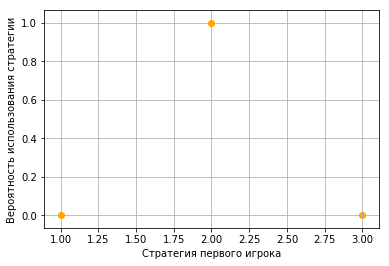

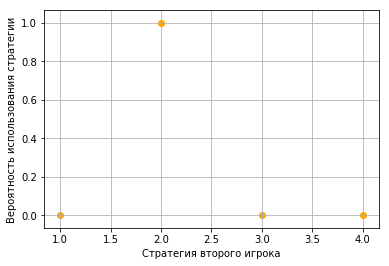

In [98]:
a = np.array([[2, 4, 7, 5], 
              [7, 6, 8, 7], 
              [5, 3, 4, 1]])
print_game(nash_equilibrium(a))

# Пример 2: спектр оптимальной стратегии неполон

 Цена игры = -1.0 
 Стратегия 1-го игрока = [ 0.   0.5  0.5] 
 Стратегия 2-го игрока = [ 0.2  0.8  0. ]


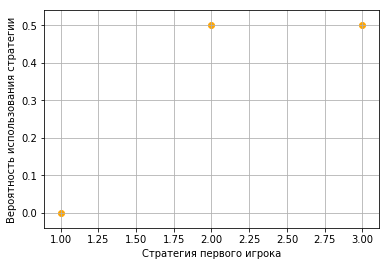

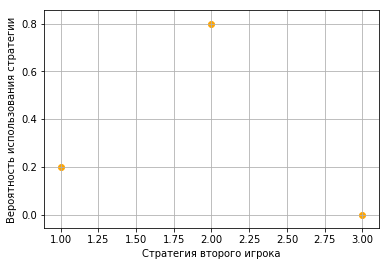

In [99]:
a = np.array([[0, -5, 6],
              [-5, 0, -2],
              [3, -2, 0]])
print_game(nash_equilibrium(a))

# Пример 3: спектр оптимальной стратегии полон

 Цена игры = 0.25 
 Стратегия 1-го игрока = [ 0.25  0.25  0.25  0.25] 
 Стратегия 2-го игрока = [ 0.25  0.25  0.25  0.25]


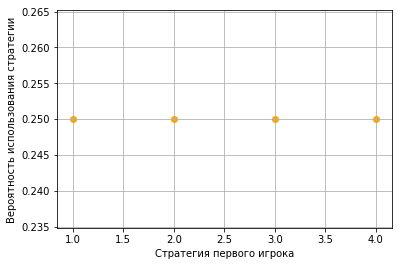

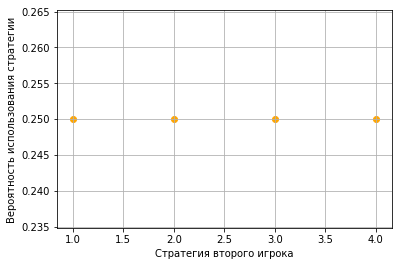

In [100]:
a = np.array([[-5, 3, 1, 2],
              [3, 1, 2, -5],
              [1, 2, -5, 3],
              [2, -5, 3, 1]])
print_game(nash_equilibrium(a))